In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
def create_input_signal(b, n):
    x = np.repeat(b, n)
    return x


# To reconstruct x from y we use the decision rule
# keeping only the values bigger than the threshold tau
def reconstruct_signal_with_threshold(noisySignal, threshold):
    for i in range(len(noisySignal)):
        if noisySignal[i] > threshold:
            noisySignal[i] = 1
        else:
            noisySignal[i] = 0
    return noisySignal


# To compute the probability of false alarm and miss
def compute_fa_m(b, b_rec, type):
    s = 0
    # it was 0 and we predicted 1
    if type == 'false_alarm':
        for i in range(len(b)):
            if b_rec[i] == 1 and b[i] == 0:
                s +=1
        return s / len(b)
    # it was 1 and we reconstructed (predicted) 0
    if type == 'miss':
        for i in range(len(b)):
            if b_rec[i] == 0 and b[i] == 1:
                s += 1
        return s / len(b)

    
def create_PFA():
    pfa = []
    div = 10
    for i in range(10):
        pfa.append(1 / div)
        div *= 10
    return pfa


def get_prob(p_fa, snr):
    n = [norm.sf(norm.isf(p_fa) - snr)]
    return n

In [3]:
p_m = 0.001
tau = 0.5
k = 10000
n = int(np.ceil(pow((norm.isf(p_m) / tau), 2)))


#binary seq of equal probability between 0 and 1, of length k = 10000
b = np.random.randint(0, 2, k)

#create a signal of length n * k, thats just signal b repeated n times
x = np.repeat(b, n)

# Generating a noise
noise = np.random.randn(k * n)

# real signal + noise = transmited signal 
y = x + noise
y_ = np.array(y)
y_mean = np.mean(y.reshape((-1, n)), 1)

In [4]:
#now we need to reconstruct x from y, to do this we simply use a threshold to make the decision -> tau = 0.5
tau = 0.5
x_rec = reconstruct_signal_with_threshold(y_, tau)
b_rec = reconstruct_signal_with_threshold(y_mean, tau)

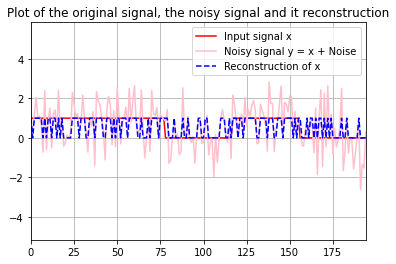

In [5]:
plt.plot(np.arange(0, k * n), x, color='red', label='Input signal x')
plt.plot(np.arange(0, k * n), y, color='pink', label='Noisy signal y = x + Noise')
plt.plot(np.arange(0, k * n), x_rec, color='blue', ls='--', label='Reconstruction of x ')
plt.title('Plot of the original signal, the noisy signal and it reconstruction')
plt.xlim(0, n * 5 - 1)
plt.grid()
plt.legend()
plt.show()


In [6]:
print('Value of P_fa:', compute_fa_m(b, b_rec, 'false_alarm'))
print('Value of P_m:', compute_fa_m(b, b_rec, 'miss'))
print('Value of P_e:', compute_fa_m(b, b_rec, 'false_alarm') + compute_fa_m(b, b_rec, 'miss'))

Value of P_fa: 0.0003
Value of P_m: 0.0004
Value of P_e: 0.0007


C:\Users\qjoao\AppData\Local\Temp\ipykernel_2772\815718419.py:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(10 * np.log10(snr), [get_prob(p, s) for s in snr], label='Pfa: %s' % p)
C:\Users\qjoao\AppData\Local\Temp\ipykernel_2772\815718419.py:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(10 * np.log10(snr), [get_prob(p, s) for s in snr], label='Pfa: %s' % p)
C:\Users\qjoao\AppData\Local\Temp\ipykernel_2772\815718419.py:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(10 * np.log10(snr), [get_prob(p, s) for s in snr], label='Pfa: %s' % p)
C:\Users\qjoao\AppData\Local\Temp\ipykernel_2772\815718419.py:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(10 * np.log10(snr), [get_prob(p, s) for s in snr], label='Pfa: %s' % p)
C:\Users\qjoao\AppData\Local\Temp\ipykernel_2772\815718419.py:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(10 * np.log10(snr), [get_prob(p, s) for s in snr], label='Pfa: %s' % p)
C:\Us

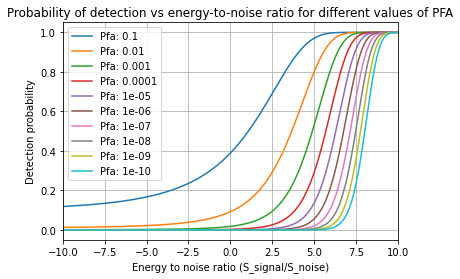

In [7]:
p_fa = create_PFA()
snr = np.linspace(-10, 10, 500)


for p in p_fa:
    plt.plot(10 * np.log10(snr), [get_prob(p, s) for s in snr], label='Pfa: %s' % p)
plt.xlabel('Energy to noise ratio (S_signal/S_noise)')
plt.ylabel('Detection probability')
plt.title('Probability of detection vs energy-to-noise ratio for different values of PFA')
plt.xlim(-10, 10)
plt.grid()
plt.legend()
plt.show()